In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/Churn_Modelling.csv")

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
X = df.iloc[:, 3:13]
y = df.iloc[:,13]

In [ ]:
print(X.shape)
print(y.shape)

(10000, 10)
(10000,)


In [ ]:
geography = pd.get_dummies(X["Geography"], drop_first=True)
gender = pd.get_dummies(X["Gender"], drop_first=True)

In [ ]:
X = pd.concat([X, geography, gender], axis=1)

In [ ]:
X = X.drop(["Geography","Gender"], axis=1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

# Train Test Split


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)

# Hyper parameter tune

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import TensorBoard
import datetime
from keras.metrics import Recall,Precision
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from keras.layers import BatchNormalization
from keras.layers import Activation
!pip install optuna
from optuna import create_study, Trial
from tensorflow.keras.optimizers import Adam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 6.9 MB/s eta 0:00:00


In [ ]:
# Define objective function
def objective(trial):
    n_layers = trial.suggest_int("n_layers", 1, 10)
    n_units = trial.suggest_int("n_units", 32, 256)
    learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-2)

    # Build and train model
    model = Sequential()
    model.add(Dense(n_units, activation="relu", input_shape=(X_train.shape[1],)))  # Input layer with explicit input shape
    for _ in range(n_layers - 1):  # Adjust loop for hidden layers only
        model.add(Dense(n_units, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))  # Output layer for binary classification
    model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=learning_rate),  metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10)

    # Evaluate on validation set
    loss, _ = model.evaluate(X_test, y_test)
    return loss


# Create Optuna study
study = create_study(direction="minimize")

# Optimize hyperparameters
study.optimize(objective, n_trials=100)

# Access best parameters
best_params = study.best_params

# Print best parameters and score
print(f"Best params: {best_params}")
print(f"Best validation loss: {study.best_value}")

[I 2024-04-24 19:47:09,373] A new study created in memory with name: no-name-0f57f5ef-ab20-4c4f-ad9d-ca9c12308c45


Epoch 1/10
250/250 [==============================] - 3s 6ms/step - loss: 0.4320 - accuracy: 0.8120
Epoch 2/10
250/250 [==============================] - 2s 6ms/step - loss: 0.3822 - accuracy: 0.8440
Epoch 3/10
250/250 [==============================] - 2s 8ms/step - loss: 0.4407 - accuracy: 0.8219
Epoch 4/10
250/250 [==============================] - 3s 11ms/step - loss: 0.4839 - accuracy: 0.8027
Epoch 5/10
250/250 [==============================] - 1s 6ms/step - loss: 0.4190 - accuracy: 0.8322
Epoch 6/10
250/250 [==============================] - 2s 7ms/step - loss: 0.4307 - accuracy: 0.8334
Epoch 7/10
250/250 [==============================] - 2s 7ms/step - loss: 0.3794 - accuracy: 0.8486
Epoch 8/10
250/250 [==============================] - 1s 5ms/step - loss: 0.3740 - accuracy: 0.8524
Epoch 9/10
250/250 [==============================] - 1s 5ms/step - loss: 0.3953 - accuracy: 0.8455
Epoch 10/10
63/63 [==============================] - 1s 5ms/step - loss: 0.3987 - accuracy: 0.8445


[I 2024-04-24 19:47:29,154] Trial 0 finished with value: 0.3986971080303192 and parameters: {'n_layers': 7, 'n_units': 201, 'learning_rate': 0.00887838810119435}. Best is trial 0 with value: 0.3986971080303192.


Epoch 1/10
250/250 [==============================] - 4s 7ms/step - loss: 0.4350 - accuracy: 0.8129
Epoch 2/10
250/250 [==============================] - 2s 8ms/step - loss: 0.3703 - accuracy: 0.8464
Epoch 3/10
250/250 [==============================] - 2s 8ms/step - loss: 0.3662 - accuracy: 0.8533
Epoch 4/10
250/250 [==============================] - 2s 7ms/step - loss: 0.3651 - accuracy: 0.8504
Epoch 5/10
250/250 [==============================] - 2s 7ms/step - loss: 0.3515 - accuracy: 0.8561
Epoch 6/10
250/250 [==============================] - 3s 12ms/step - loss: 0.3575 - accuracy: 0.8556
Epoch 7/10
250/250 [==============================] - 2s 7ms/step - loss: 0.3747 - accuracy: 0.8484
Epoch 8/10
250/250 [==============================] - 2s 8ms/step - loss: 0.3529 - accuracy: 0.8608
Epoch 9/10
250/250 [==============================] - 2s 7ms/step - loss: 0.3438 - accuracy: 0.8627
Epoch 10/10
63/63 [==============================] - 0s 3ms/step - loss: 0.3548 - accuracy: 0.8515


[I 2024-04-24 19:47:51,557] Trial 1 finished with value: 0.35483482480049133 and parameters: {'n_layers': 9, 'n_units': 201, 'learning_rate': 0.0045602935792577615}. Best is trial 1 with value: 0.35483482480049133.


Epoch 1/10
250/250 [==============================] - 2s 4ms/step - loss: 0.4202 - accuracy: 0.8261
Epoch 2/10
250/250 [==============================] - 2s 6ms/step - loss: 0.3629 - accuracy: 0.8560
Epoch 3/10
250/250 [==============================] - 1s 6ms/step - loss: 0.3632 - accuracy: 0.8540
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3489 - accuracy: 0.8604
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3458 - accuracy: 0.8614
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3441 - accuracy: 0.8596
Epoch 7/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3491 - accuracy: 0.8614
Epoch 8/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3399 - accuracy: 0.8660
Epoch 9/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3374 - accuracy: 0.8646
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3516 - accuracy: 0.8535


[I 2024-04-24 19:48:14,130] Trial 2 finished with value: 0.3516133725643158 and parameters: {'n_layers': 6, 'n_units': 105, 'learning_rate': 0.007194019710093121}. Best is trial 2 with value: 0.3516133725643158.


Epoch 1/10
250/250 [==============================] - 3s 5ms/step - loss: 0.4035 - accuracy: 0.8365
Epoch 2/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3511 - accuracy: 0.8574
Epoch 3/10
250/250 [==============================] - 2s 6ms/step - loss: 0.3438 - accuracy: 0.8594
Epoch 4/10
250/250 [==============================] - 2s 7ms/step - loss: 0.3411 - accuracy: 0.8625
Epoch 5/10
250/250 [==============================] - 1s 6ms/step - loss: 0.3373 - accuracy: 0.8651
Epoch 6/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3314 - accuracy: 0.8656
Epoch 7/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3248 - accuracy: 0.8661
Epoch 8/10
250/250 [==============================] - 1s 5ms/step - loss: 0.3254 - accuracy: 0.8660
Epoch 9/10
250/250 [==============================] - 2s 8ms/step - loss: 0.3166 - accuracy: 0.8706
Epoch 10/10
63/63 [==============================] - 0s 3ms/step - loss: 0.3588 - accuracy: 0.8460


[I 2024-04-24 19:48:36,766] Trial 3 finished with value: 0.3588455617427826 and parameters: {'n_layers': 5, 'n_units': 208, 'learning_rate': 0.001979370190058318}. Best is trial 2 with value: 0.3516133725643158.


Epoch 1/10
250/250 [==============================] - 4s 8ms/step - loss: 0.4073 - accuracy: 0.8281
Epoch 2/10
250/250 [==============================] - 2s 8ms/step - loss: 0.3497 - accuracy: 0.8579
Epoch 3/10
250/250 [==============================] - 3s 11ms/step - loss: 0.3369 - accuracy: 0.8614
Epoch 4/10
250/250 [==============================] - 2s 9ms/step - loss: 0.3362 - accuracy: 0.8648
Epoch 5/10
250/250 [==============================] - 2s 8ms/step - loss: 0.3270 - accuracy: 0.8679
Epoch 6/10
250/250 [==============================] - 2s 8ms/step - loss: 0.3219 - accuracy: 0.8673
Epoch 7/10
250/250 [==============================] - 2s 8ms/step - loss: 0.3163 - accuracy: 0.8712
Epoch 8/10
250/250 [==============================] - 2s 7ms/step - loss: 0.3084 - accuracy: 0.8735
Epoch 9/10
250/250 [==============================] - 3s 12ms/step - loss: 0.3043 - accuracy: 0.8752
Epoch 10/10
63/63 [==============================] - 0s 3ms/step - loss: 0.3635 - accuracy: 0.8565

[I 2024-04-24 19:49:01,728] Trial 4 finished with value: 0.36349207162857056 and parameters: {'n_layers': 6, 'n_units': 229, 'learning_rate': 0.0009146599509844332}. Best is trial 2 with value: 0.3516133725643158.


Epoch 1/10
250/250 [==============================] - 2s 5ms/step - loss: 0.4039 - accuracy: 0.8341
Epoch 2/10
250/250 [==============================] - 1s 5ms/step - loss: 0.3727 - accuracy: 0.8484
Epoch 3/10
250/250 [==============================] - 1s 5ms/step - loss: 0.3617 - accuracy: 0.8529
Epoch 4/10
250/250 [==============================] - 1s 5ms/step - loss: 0.3579 - accuracy: 0.8562
Epoch 5/10
250/250 [==============================] - 1s 5ms/step - loss: 0.3443 - accuracy: 0.8614
Epoch 6/10
250/250 [==============================] - 2s 6ms/step - loss: 0.3417 - accuracy: 0.8616
Epoch 7/10
250/250 [==============================] - 2s 7ms/step - loss: 0.3392 - accuracy: 0.8616
Epoch 8/10
250/250 [==============================] - 1s 5ms/step - loss: 0.3446 - accuracy: 0.8591
Epoch 9/10
250/250 [==============================] - 1s 6ms/step - loss: 0.3386 - accuracy: 0.8622
Epoch 10/10
63/63 [==============================] - 1s 8ms/step - loss: 0.3547 - accuracy: 0.8550


[I 2024-04-24 19:49:18,104] Trial 5 finished with value: 0.35473522543907166 and parameters: {'n_layers': 4, 'n_units': 218, 'learning_rate': 0.008037862443573225}. Best is trial 2 with value: 0.3516133725643158.


Epoch 1/10
250/250 [==============================] - 3s 4ms/step - loss: 0.4224 - accuracy: 0.8248
Epoch 2/10
250/250 [==============================] - 2s 6ms/step - loss: 0.3639 - accuracy: 0.8504
Epoch 3/10
250/250 [==============================] - 2s 8ms/step - loss: 0.3484 - accuracy: 0.8599
Epoch 4/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3431 - accuracy: 0.8609
Epoch 5/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3412 - accuracy: 0.8612
Epoch 6/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3357 - accuracy: 0.8644
Epoch 7/10
250/250 [==============================] - 1s 5ms/step - loss: 0.3293 - accuracy: 0.8673
Epoch 8/10
250/250 [==============================] - 1s 5ms/step - loss: 0.3272 - accuracy: 0.8655
Epoch 9/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3248 - accuracy: 0.8637
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3591 - accuracy: 0.8490


[I 2024-04-24 19:49:41,404] Trial 6 finished with value: 0.3590901494026184 and parameters: {'n_layers': 10, 'n_units': 96, 'learning_rate': 0.00206328133715455}. Best is trial 2 with value: 0.3516133725643158.


Epoch 1/10
250/250 [==============================] - 2s 3ms/step - loss: 0.4031 - accuracy: 0.8325
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3569 - accuracy: 0.8524
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3502 - accuracy: 0.8605
Epoch 4/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3428 - accuracy: 0.8614
Epoch 5/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3412 - accuracy: 0.8616
Epoch 6/10
250/250 [==============================] - 1s 5ms/step - loss: 0.3338 - accuracy: 0.8655
Epoch 7/10
250/250 [==============================] - 1s 6ms/step - loss: 0.3313 - accuracy: 0.8655
Epoch 8/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3290 - accuracy: 0.8681
Epoch 9/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3270 - accuracy: 0.8685
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3595 - accuracy: 0.8525


[I 2024-04-24 19:49:54,127] Trial 7 finished with value: 0.3594660758972168 and parameters: {'n_layers': 7, 'n_units': 76, 'learning_rate': 0.0033714117035678445}. Best is trial 2 with value: 0.3516133725643158.


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3996 - accuracy: 0.8342
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3552 - accuracy: 0.8537
Epoch 3/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3532 - accuracy: 0.8549
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3454 - accuracy: 0.8572
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3405 - accuracy: 0.8575
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3386 - accuracy: 0.8609
Epoch 7/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3367 - accuracy: 0.8610
Epoch 8/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3360 - accuracy: 0.8610
Epoch 9/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3339 - accuracy: 0.8651
Epoch 10/10
63/63 [==============================] - 0s 4ms/step - loss: 0.3443 - accuracy: 0.8545


[I 2024-04-24 19:50:00,412] Trial 8 finished with value: 0.3443101644515991 and parameters: {'n_layers': 1, 'n_units': 98, 'learning_rate': 0.008742140890248962}. Best is trial 8 with value: 0.3443101644515991.


Epoch 1/10
250/250 [==============================] - 3s 5ms/step - loss: 0.4040 - accuracy: 0.8329
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3570 - accuracy: 0.8549
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3471 - accuracy: 0.8605
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3419 - accuracy: 0.8616
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3387 - accuracy: 0.8631
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3374 - accuracy: 0.8615
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3331 - accuracy: 0.8641
Epoch 8/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3300 - accuracy: 0.8665
Epoch 9/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3287 - accuracy: 0.8659
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3528 - accuracy: 0.8505


[I 2024-04-24 19:50:12,958] Trial 9 finished with value: 0.35277673602104187 and parameters: {'n_layers': 3, 'n_units': 60, 'learning_rate': 0.007758020024180745}. Best is trial 8 with value: 0.3443101644515991.


Epoch 1/10
250/250 [==============================] - 2s 3ms/step - loss: 0.3971 - accuracy: 0.8350
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3530 - accuracy: 0.8544
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3521 - accuracy: 0.8570
Epoch 4/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3453 - accuracy: 0.8597
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3416 - accuracy: 0.8604
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3386 - accuracy: 0.8604
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3349 - accuracy: 0.8634
Epoch 8/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3337 - accuracy: 0.8624
Epoch 9/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3344 - accuracy: 0.8622
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3372 - accuracy: 0.8645


[I 2024-04-24 19:50:24,693] Trial 10 finished with value: 0.33723118901252747 and parameters: {'n_layers': 1, 'n_units': 129, 'learning_rate': 0.006129525415913063}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3952 - accuracy: 0.8324
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3533 - accuracy: 0.8555
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3498 - accuracy: 0.8568
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3422 - accuracy: 0.8609
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3399 - accuracy: 0.8605
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3374 - accuracy: 0.8608
Epoch 7/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3358 - accuracy: 0.8609
Epoch 8/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3336 - accuracy: 0.8620
Epoch 9/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3317 - accuracy: 0.8631
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3481 - accuracy: 0.8560


[I 2024-04-24 19:50:31,892] Trial 11 finished with value: 0.3480846881866455 and parameters: {'n_layers': 1, 'n_units': 144, 'learning_rate': 0.006060302151474686}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3916 - accuracy: 0.8354
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3573 - accuracy: 0.8540
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3514 - accuracy: 0.8565
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3437 - accuracy: 0.8606
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3426 - accuracy: 0.8595
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3401 - accuracy: 0.8569
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3396 - accuracy: 0.8626
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3369 - accuracy: 0.8625
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3350 - accuracy: 0.8612
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3432 - accuracy: 0.8630


[I 2024-04-24 19:50:43,159] Trial 12 finished with value: 0.3432357609272003 and parameters: {'n_layers': 1, 'n_units': 143, 'learning_rate': 0.009744089561743503}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4002 - accuracy: 0.8411
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3566 - accuracy: 0.8530
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3498 - accuracy: 0.8572
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3453 - accuracy: 0.8612
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3447 - accuracy: 0.8597
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3388 - accuracy: 0.8622
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3390 - accuracy: 0.8641
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3347 - accuracy: 0.8640
Epoch 9/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3320 - accuracy: 0.8635
Epoch 10/10
63/63 [==============================] - 0s 4ms/step - loss: 0.3539 - accuracy: 0.8645


[I 2024-04-24 19:50:52,465] Trial 13 finished with value: 0.3539005517959595 and parameters: {'n_layers': 2, 'n_units': 150, 'learning_rate': 0.009835559930536631}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 2s 3ms/step - loss: 0.3943 - accuracy: 0.8353
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3585 - accuracy: 0.8571
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3481 - accuracy: 0.8576
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3425 - accuracy: 0.8595
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3423 - accuracy: 0.8619
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3355 - accuracy: 0.8600
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3349 - accuracy: 0.8609
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3283 - accuracy: 0.8684
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3283 - accuracy: 0.8673
Epoch 10/10
63/63 [==============================] - 0s 3ms/step - loss: 0.3616 - accuracy: 0.8510


[I 2024-04-24 19:51:04,881] Trial 14 finished with value: 0.36163926124572754 and parameters: {'n_layers': 3, 'n_units': 151, 'learning_rate': 0.005881157356016604}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4001 - accuracy: 0.8300
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3559 - accuracy: 0.8550
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3519 - accuracy: 0.8555
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3437 - accuracy: 0.8606
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3428 - accuracy: 0.8583
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3406 - accuracy: 0.8606
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3374 - accuracy: 0.8622
Epoch 8/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3360 - accuracy: 0.8621
Epoch 9/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3335 - accuracy: 0.8635
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3459 - accuracy: 0.8545


[I 2024-04-24 19:51:11,218] Trial 15 finished with value: 0.3459400236606598 and parameters: {'n_layers': 1, 'n_units': 172, 'learning_rate': 0.00458816116139052}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 2s 4ms/step - loss: 0.3925 - accuracy: 0.8376
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3610 - accuracy: 0.8553
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3461 - accuracy: 0.8594
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3436 - accuracy: 0.8596
Epoch 5/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3388 - accuracy: 0.8645
Epoch 6/10
250/250 [==============================] - 1s 5ms/step - loss: 0.3376 - accuracy: 0.8610
Epoch 7/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3332 - accuracy: 0.8666
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3343 - accuracy: 0.8649
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3289 - accuracy: 0.8670
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3568 - accuracy: 0.8525


[I 2024-04-24 19:51:20,970] Trial 16 finished with value: 0.35680216550827026 and parameters: {'n_layers': 3, 'n_units': 123, 'learning_rate': 0.006421678058084596}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 2s 4ms/step - loss: 0.3950 - accuracy: 0.8361
Epoch 2/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3552 - accuracy: 0.8551
Epoch 3/10
250/250 [==============================] - 1s 5ms/step - loss: 0.3508 - accuracy: 0.8561
Epoch 4/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3463 - accuracy: 0.8602
Epoch 5/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3384 - accuracy: 0.8611
Epoch 6/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3397 - accuracy: 0.8606
Epoch 7/10
250/250 [==============================] - 2s 7ms/step - loss: 0.3357 - accuracy: 0.8621
Epoch 8/10
250/250 [==============================] - 2s 7ms/step - loss: 0.3350 - accuracy: 0.8622
Epoch 9/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3297 - accuracy: 0.8645
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3528 - accuracy: 0.8600


[I 2024-04-24 19:51:33,508] Trial 17 finished with value: 0.35279911756515503 and parameters: {'n_layers': 2, 'n_units': 255, 'learning_rate': 0.009501167235141782}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 2s 3ms/step - loss: 0.4124 - accuracy: 0.8244
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3516 - accuracy: 0.8551
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3384 - accuracy: 0.8627
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3354 - accuracy: 0.8624
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3317 - accuracy: 0.8621
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3264 - accuracy: 0.8651
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3270 - accuracy: 0.8659
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3223 - accuracy: 0.8673
Epoch 9/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3213 - accuracy: 0.8695
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3459 - accuracy: 0.8565


[I 2024-04-24 19:51:45,505] Trial 18 finished with value: 0.3458828330039978 and parameters: {'n_layers': 4, 'n_units': 36, 'learning_rate': 0.0032408036167017066}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3943 - accuracy: 0.8374
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3563 - accuracy: 0.8559
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3520 - accuracy: 0.8584
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3454 - accuracy: 0.8618
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3424 - accuracy: 0.8614
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3376 - accuracy: 0.8610
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3343 - accuracy: 0.8661
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3328 - accuracy: 0.8643
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3303 - accuracy: 0.8636
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3493 - accuracy: 0.8570


[I 2024-04-24 19:51:57,081] Trial 19 finished with value: 0.3492647409439087 and parameters: {'n_layers': 2, 'n_units': 177, 'learning_rate': 0.006863770975295065}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 3s 3ms/step - loss: 0.4055 - accuracy: 0.8320
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3581 - accuracy: 0.8547
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3455 - accuracy: 0.8599
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3412 - accuracy: 0.8633
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3386 - accuracy: 0.8643
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3373 - accuracy: 0.8645
Epoch 7/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3340 - accuracy: 0.8646
Epoch 8/10
250/250 [==============================] - 1s 5ms/step - loss: 0.3305 - accuracy: 0.8646
Epoch 9/10
250/250 [==============================] - 1s 6ms/step - loss: 0.3295 - accuracy: 0.8669
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3511 - accuracy: 0.8510


[I 2024-04-24 19:52:10,039] Trial 20 finished with value: 0.3510719835758209 and parameters: {'n_layers': 4, 'n_units': 116, 'learning_rate': 0.005596645337510031}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4004 - accuracy: 0.8317
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3566 - accuracy: 0.8540
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3488 - accuracy: 0.8571
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3455 - accuracy: 0.8584
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3411 - accuracy: 0.8605
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3402 - accuracy: 0.8618
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3379 - accuracy: 0.8620
Epoch 8/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3351 - accuracy: 0.8615
Epoch 9/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3349 - accuracy: 0.8622
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3548 - accuracy: 0.8590


[I 2024-04-24 19:52:16,220] Trial 21 finished with value: 0.3548271656036377 and parameters: {'n_layers': 1, 'n_units': 85, 'learning_rate': 0.00858909166059804}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3962 - accuracy: 0.8321
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3558 - accuracy: 0.8559
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3491 - accuracy: 0.8546
Epoch 4/10
250/250 [==============================] - 1s 5ms/step - loss: 0.3443 - accuracy: 0.8562
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3417 - accuracy: 0.8577
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3395 - accuracy: 0.8586
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3384 - accuracy: 0.8606
Epoch 8/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3352 - accuracy: 0.8644
Epoch 9/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3342 - accuracy: 0.8625
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3481 - accuracy: 0.8550


[I 2024-04-24 19:52:27,458] Trial 22 finished with value: 0.3480628430843353 and parameters: {'n_layers': 1, 'n_units': 127, 'learning_rate': 0.00893938436094395}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 2s 4ms/step - loss: 0.3965 - accuracy: 0.8378
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3586 - accuracy: 0.8547
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3464 - accuracy: 0.8566
Epoch 4/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3436 - accuracy: 0.8606
Epoch 5/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3418 - accuracy: 0.8589
Epoch 6/10
250/250 [==============================] - 1s 5ms/step - loss: 0.3367 - accuracy: 0.8616
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3348 - accuracy: 0.8625
Epoch 8/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3333 - accuracy: 0.8646
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3345 - accuracy: 0.8624
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3450 - accuracy: 0.8605


[I 2024-04-24 19:52:39,058] Trial 23 finished with value: 0.3449605107307434 and parameters: {'n_layers': 2, 'n_units': 174, 'learning_rate': 0.00992044310688143}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4019 - accuracy: 0.8292
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3547 - accuracy: 0.8531
Epoch 3/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3506 - accuracy: 0.8545
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3454 - accuracy: 0.8576
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3429 - accuracy: 0.8580
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3389 - accuracy: 0.8606
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3372 - accuracy: 0.8605
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3352 - accuracy: 0.8635
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3361 - accuracy: 0.8630
Epoch 10/10
63/63 [==============================] - 0s 3ms/step - loss: 0.3465 - accuracy: 0.8580


[I 2024-04-24 19:52:46,311] Trial 24 finished with value: 0.34647196531295776 and parameters: {'n_layers': 1, 'n_units': 64, 'learning_rate': 0.00804990855232094}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 2s 3ms/step - loss: 0.3889 - accuracy: 0.8374
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3543 - accuracy: 0.8556
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3467 - accuracy: 0.8580
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3433 - accuracy: 0.8596
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3422 - accuracy: 0.8611
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3382 - accuracy: 0.8608
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3356 - accuracy: 0.8630
Epoch 8/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3325 - accuracy: 0.8634
Epoch 9/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3304 - accuracy: 0.8683
Epoch 10/10
63/63 [==============================] - 0s 3ms/step - loss: 0.3535 - accuracy: 0.8570


[I 2024-04-24 19:52:58,239] Trial 25 finished with value: 0.3535481095314026 and parameters: {'n_layers': 2, 'n_units': 130, 'learning_rate': 0.00743214000413802}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 2s 3ms/step - loss: 0.3933 - accuracy: 0.8404
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3612 - accuracy: 0.8544
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3490 - accuracy: 0.8571
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3450 - accuracy: 0.8581
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3418 - accuracy: 0.8635
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3366 - accuracy: 0.8639
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3368 - accuracy: 0.8629
Epoch 8/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3348 - accuracy: 0.8593
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3332 - accuracy: 0.8654
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3533 - accuracy: 0.8510


[I 2024-04-24 19:53:07,062] Trial 26 finished with value: 0.35331252217292786 and parameters: {'n_layers': 3, 'n_units': 104, 'learning_rate': 0.009062178623960797}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3947 - accuracy: 0.8342
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3557 - accuracy: 0.8537
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3484 - accuracy: 0.8556
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3434 - accuracy: 0.8600
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3428 - accuracy: 0.8587
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3401 - accuracy: 0.8597
Epoch 7/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3361 - accuracy: 0.8626
Epoch 8/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3349 - accuracy: 0.8600
Epoch 9/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3333 - accuracy: 0.8614
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3516 - accuracy: 0.8555


[I 2024-04-24 19:53:14,252] Trial 27 finished with value: 0.3516227900981903 and parameters: {'n_layers': 1, 'n_units': 157, 'learning_rate': 0.005152135353432168}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 2s 3ms/step - loss: 0.4099 - accuracy: 0.8313
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3699 - accuracy: 0.8480
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3527 - accuracy: 0.8574
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3515 - accuracy: 0.8583
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3484 - accuracy: 0.8609
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3441 - accuracy: 0.8577
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3402 - accuracy: 0.8626
Epoch 8/10
250/250 [==============================] - 1s 6ms/step - loss: 0.3402 - accuracy: 0.8609
Epoch 9/10
250/250 [==============================] - 1s 5ms/step - loss: 0.3356 - accuracy: 0.8654
Epoch 10/10
63/63 [==============================] - 0s 3ms/step - loss: 0.3462 - accuracy: 0.8565


[I 2024-04-24 19:53:26,289] Trial 28 finished with value: 0.3462039828300476 and parameters: {'n_layers': 5, 'n_units': 136, 'learning_rate': 0.008370976628393482}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 2s 3ms/step - loss: 0.4283 - accuracy: 0.8194
Epoch 2/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3747 - accuracy: 0.8508
Epoch 3/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3602 - accuracy: 0.8543
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3529 - accuracy: 0.8585
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3501 - accuracy: 0.8627
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3428 - accuracy: 0.8561
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3406 - accuracy: 0.8627
Epoch 8/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3413 - accuracy: 0.8626
Epoch 9/10
250/250 [==============================] - 1s 6ms/step - loss: 0.3354 - accuracy: 0.8645
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3666 - accuracy: 0.8510


[I 2024-04-24 19:53:38,837] Trial 29 finished with value: 0.3666301965713501 and parameters: {'n_layers': 8, 'n_units': 34, 'learning_rate': 0.008998792840437716}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3922 - accuracy: 0.8404
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3523 - accuracy: 0.8559
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3442 - accuracy: 0.8609
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3375 - accuracy: 0.8656
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3359 - accuracy: 0.8633
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3343 - accuracy: 0.8641
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3314 - accuracy: 0.8635
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3296 - accuracy: 0.8650
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3260 - accuracy: 0.8671
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3439 - accuracy: 0.8615


[I 2024-04-24 19:53:50,283] Trial 30 finished with value: 0.3439174294471741 and parameters: {'n_layers': 2, 'n_units': 89, 'learning_rate': 0.006757992203955355}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3890 - accuracy: 0.8407
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3552 - accuracy: 0.8545
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3467 - accuracy: 0.8585
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3409 - accuracy: 0.8589
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3365 - accuracy: 0.8620
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3321 - accuracy: 0.8639
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3284 - accuracy: 0.8659
Epoch 8/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3277 - accuracy: 0.8673
Epoch 9/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3281 - accuracy: 0.8674
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3514 - accuracy: 0.8590


[I 2024-04-24 19:53:57,380] Trial 31 finished with value: 0.35136091709136963 and parameters: {'n_layers': 2, 'n_units': 89, 'learning_rate': 0.006699457856345013}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4153 - accuracy: 0.8226
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3572 - accuracy: 0.8541
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3485 - accuracy: 0.8577
Epoch 4/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3458 - accuracy: 0.8602
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3411 - accuracy: 0.8600
Epoch 6/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3439 - accuracy: 0.8587
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3401 - accuracy: 0.8585
Epoch 8/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3390 - accuracy: 0.8618
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3375 - accuracy: 0.8621
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3490 - accuracy: 0.8600


[I 2024-04-24 19:54:08,746] Trial 32 finished with value: 0.34901002049446106 and parameters: {'n_layers': 1, 'n_units': 66, 'learning_rate': 0.003988864631854315}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3926 - accuracy: 0.8397
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3572 - accuracy: 0.8555
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3465 - accuracy: 0.8553
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3410 - accuracy: 0.8627
Epoch 5/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3404 - accuracy: 0.8629
Epoch 6/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3332 - accuracy: 0.8641
Epoch 7/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3339 - accuracy: 0.8629
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3301 - accuracy: 0.8652
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3303 - accuracy: 0.8652
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3635 - accuracy: 0.8380


[I 2024-04-24 19:54:18,031] Trial 33 finished with value: 0.3635058104991913 and parameters: {'n_layers': 2, 'n_units': 108, 'learning_rate': 0.007449898197794147}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 2s 3ms/step - loss: 0.4012 - accuracy: 0.8344
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3625 - accuracy: 0.8535
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3522 - accuracy: 0.8561
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3431 - accuracy: 0.8590
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3399 - accuracy: 0.8589
Epoch 6/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3417 - accuracy: 0.8600
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3373 - accuracy: 0.8612
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3351 - accuracy: 0.8634
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3303 - accuracy: 0.8650
Epoch 10/10
63/63 [==============================] - 0s 3ms/step - loss: 0.3499 - accuracy: 0.8545


[I 2024-04-24 19:54:27,650] Trial 34 finished with value: 0.3498550057411194 and parameters: {'n_layers': 3, 'n_units': 110, 'learning_rate': 0.00941173063215152}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4242 - accuracy: 0.8151
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3576 - accuracy: 0.8540
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3475 - accuracy: 0.8593
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3444 - accuracy: 0.8585
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3440 - accuracy: 0.8595
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3405 - accuracy: 0.8589
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3396 - accuracy: 0.8599
Epoch 8/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3383 - accuracy: 0.8618
Epoch 9/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3372 - accuracy: 0.8626
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3486 - accuracy: 0.8565


[I 2024-04-24 19:54:34,419] Trial 35 finished with value: 0.3485943078994751 and parameters: {'n_layers': 1, 'n_units': 49, 'learning_rate': 0.005423881440592116}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3930 - accuracy: 0.8366
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3544 - accuracy: 0.8545
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3527 - accuracy: 0.8570
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3412 - accuracy: 0.8608
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3433 - accuracy: 0.8620
Epoch 6/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3369 - accuracy: 0.8605
Epoch 7/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3343 - accuracy: 0.8641
Epoch 8/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3329 - accuracy: 0.8636
Epoch 9/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3309 - accuracy: 0.8651
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3470 - accuracy: 0.8580


[I 2024-04-24 19:54:43,143] Trial 36 finished with value: 0.34695059061050415 and parameters: {'n_layers': 2, 'n_units': 164, 'learning_rate': 0.00701529693380396}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 2s 3ms/step - loss: 0.4036 - accuracy: 0.8347
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3560 - accuracy: 0.8547
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3474 - accuracy: 0.8608
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3451 - accuracy: 0.8580
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3379 - accuracy: 0.8635
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3397 - accuracy: 0.8615
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3346 - accuracy: 0.8648
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3300 - accuracy: 0.8622
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3293 - accuracy: 0.8651
Epoch 10/10
63/63 [==============================] - 0s 3ms/step - loss: 0.3516 - accuracy: 0.8550


[I 2024-04-24 19:54:52,911] Trial 37 finished with value: 0.35162827372550964 and parameters: {'n_layers': 4, 'n_units': 95, 'learning_rate': 0.006262183964319756}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 2s 2ms/step - loss: 0.3976 - accuracy: 0.8294
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3565 - accuracy: 0.8539
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3511 - accuracy: 0.8558
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3502 - accuracy: 0.8569
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3449 - accuracy: 0.8624
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3416 - accuracy: 0.8585
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3412 - accuracy: 0.8574
Epoch 8/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3362 - accuracy: 0.8604
Epoch 9/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3352 - accuracy: 0.8621
Epoch 10/10
63/63 [==============================] - 0s 3ms/step - loss: 0.3519 - accuracy: 0.8590


[I 2024-04-24 19:55:01,077] Trial 38 finished with value: 0.351889967918396 and parameters: {'n_layers': 1, 'n_units': 83, 'learning_rate': 0.0083789123212034}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 4s 9ms/step - loss: 0.4292 - accuracy: 0.8263
Epoch 2/10
250/250 [==============================] - 2s 10ms/step - loss: 0.3862 - accuracy: 0.8351
Epoch 3/10
250/250 [==============================] - 2s 6ms/step - loss: 0.3732 - accuracy: 0.8510
Epoch 4/10
250/250 [==============================] - 2s 7ms/step - loss: 0.3698 - accuracy: 0.8525
Epoch 5/10
250/250 [==============================] - 2s 8ms/step - loss: 0.3537 - accuracy: 0.8558
Epoch 6/10
250/250 [==============================] - 2s 7ms/step - loss: 0.3661 - accuracy: 0.8481
Epoch 7/10
250/250 [==============================] - 2s 6ms/step - loss: 0.3663 - accuracy: 0.8547
Epoch 8/10
250/250 [==============================] - 2s 7ms/step - loss: 0.3446 - accuracy: 0.8599
Epoch 9/10
250/250 [==============================] - 3s 10ms/step - loss: 0.3349 - accuracy: 0.8608
Epoch 10/10
63/63 [==============================] - 0s 4ms/step - loss: 0.3926 - accuracy: 0.8560

[I 2024-04-24 19:55:23,056] Trial 39 finished with value: 0.39264294505119324 and parameters: {'n_layers': 7, 'n_units': 194, 'learning_rate': 0.004621978176169}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 3s 5ms/step - loss: 0.4139 - accuracy: 0.8289
Epoch 2/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3678 - accuracy: 0.8553
Epoch 3/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3736 - accuracy: 0.8476
Epoch 4/10
250/250 [==============================] - 1s 5ms/step - loss: 0.3616 - accuracy: 0.8571
Epoch 5/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3513 - accuracy: 0.8549
Epoch 6/10
250/250 [==============================] - 2s 7ms/step - loss: 0.3690 - accuracy: 0.8497
Epoch 7/10
250/250 [==============================] - 2s 6ms/step - loss: 0.3498 - accuracy: 0.8602
Epoch 8/10
250/250 [==============================] - 1s 5ms/step - loss: 0.3410 - accuracy: 0.8599
Epoch 9/10
250/250 [==============================] - 1s 5ms/step - loss: 0.3411 - accuracy: 0.8600
Epoch 10/10
63/63 [==============================] - 0s 3ms/step - loss: 0.3507 - accuracy: 0.8510


[I 2024-04-24 19:55:38,060] Trial 40 finished with value: 0.350668340921402 and parameters: {'n_layers': 6, 'n_units': 140, 'learning_rate': 0.007759802543204952}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3998 - accuracy: 0.8332
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3586 - accuracy: 0.8558
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3476 - accuracy: 0.8575
Epoch 4/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3433 - accuracy: 0.8618
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3395 - accuracy: 0.8635
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3392 - accuracy: 0.8646
Epoch 7/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3379 - accuracy: 0.8648
Epoch 8/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3349 - accuracy: 0.8636
Epoch 9/10
250/250 [==============================] - 1s 5ms/step - loss: 0.3328 - accuracy: 0.8640
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3605 - accuracy: 0.8470


[I 2024-04-24 19:55:48,083] Trial 41 finished with value: 0.3604718744754791 and parameters: {'n_layers': 2, 'n_units': 187, 'learning_rate': 0.009885340622741432}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 2s 4ms/step - loss: 0.3924 - accuracy: 0.8376
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3597 - accuracy: 0.8521
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3515 - accuracy: 0.8564
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3466 - accuracy: 0.8602
Epoch 5/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3456 - accuracy: 0.8601
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3466 - accuracy: 0.8580
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3373 - accuracy: 0.8616
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3351 - accuracy: 0.8645
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3321 - accuracy: 0.8633
Epoch 10/10
63/63 [==============================] - 0s 3ms/step - loss: 0.3492 - accuracy: 0.8565


[I 2024-04-24 19:55:57,779] Trial 42 finished with value: 0.3492294251918793 and parameters: {'n_layers': 2, 'n_units': 209, 'learning_rate': 0.009334293387188703}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 4s 5ms/step - loss: 0.4651 - accuracy: 0.8189
Epoch 2/10
250/250 [==============================] - 1s 5ms/step - loss: 0.4096 - accuracy: 0.8321
Epoch 3/10
250/250 [==============================] - 1s 5ms/step - loss: 0.3661 - accuracy: 0.8482
Epoch 4/10
250/250 [==============================] - 1s 6ms/step - loss: 0.4259 - accuracy: 0.8514
Epoch 5/10
250/250 [==============================] - 1s 6ms/step - loss: 0.3762 - accuracy: 0.8424
Epoch 6/10
250/250 [==============================] - 1s 6ms/step - loss: 0.3732 - accuracy: 0.8425
Epoch 7/10
250/250 [==============================] - 2s 7ms/step - loss: 0.3640 - accuracy: 0.8522
Epoch 8/10
250/250 [==============================] - 2s 8ms/step - loss: 0.3523 - accuracy: 0.8537
Epoch 9/10
250/250 [==============================] - 1s 6ms/step - loss: 0.3384 - accuracy: 0.8624
Epoch 10/10
63/63 [==============================] - 0s 3ms/step - loss: 0.3645 - accuracy: 0.8505


[I 2024-04-24 19:56:21,822] Trial 43 finished with value: 0.36449918150901794 and parameters: {'n_layers': 10, 'n_units': 119, 'learning_rate': 0.009735646900782043}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 3s 6ms/step - loss: 0.4050 - accuracy: 0.8340
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3613 - accuracy: 0.8541
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3544 - accuracy: 0.8545
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3487 - accuracy: 0.8606
Epoch 5/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3423 - accuracy: 0.8619
Epoch 6/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3425 - accuracy: 0.8576
Epoch 7/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3385 - accuracy: 0.8608
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3411 - accuracy: 0.8605
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3361 - accuracy: 0.8624
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3574 - accuracy: 0.8580


[I 2024-04-24 19:56:34,176] Trial 44 finished with value: 0.35744038224220276 and parameters: {'n_layers': 3, 'n_units': 162, 'learning_rate': 0.00997096009474832}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 3s 5ms/step - loss: 0.4204 - accuracy: 0.8236
Epoch 2/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3654 - accuracy: 0.8525
Epoch 3/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3553 - accuracy: 0.8572
Epoch 4/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3498 - accuracy: 0.8581
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3453 - accuracy: 0.8587
Epoch 6/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3507 - accuracy: 0.8604
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3444 - accuracy: 0.8584
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3372 - accuracy: 0.8610
Epoch 9/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3375 - accuracy: 0.8636
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3482 - accuracy: 0.8495


[I 2024-04-24 19:56:46,544] Trial 45 finished with value: 0.34815192222595215 and parameters: {'n_layers': 5, 'n_units': 100, 'learning_rate': 0.008811932364566037}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 4s 6ms/step - loss: 0.4326 - accuracy: 0.8185
Epoch 2/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3841 - accuracy: 0.8503
Epoch 3/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3662 - accuracy: 0.8495
Epoch 4/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3641 - accuracy: 0.8529
Epoch 5/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3520 - accuracy: 0.8570
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3501 - accuracy: 0.8584
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3480 - accuracy: 0.8593
Epoch 8/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3558 - accuracy: 0.8484
Epoch 9/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3446 - accuracy: 0.8576
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3810 - accuracy: 0.8530


[I 2024-04-24 19:56:59,393] Trial 46 finished with value: 0.38098493218421936 and parameters: {'n_layers': 9, 'n_units': 74, 'learning_rate': 0.00823582797144093}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3889 - accuracy: 0.8361
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3567 - accuracy: 0.8541
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3535 - accuracy: 0.8568
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3480 - accuracy: 0.8564
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3475 - accuracy: 0.8576
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3424 - accuracy: 0.8593
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3419 - accuracy: 0.8586
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3397 - accuracy: 0.8605
Epoch 9/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3374 - accuracy: 0.8610
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3473 - accuracy: 0.8670


[I 2024-04-24 19:57:10,649] Trial 47 finished with value: 0.3473202884197235 and parameters: {'n_layers': 1, 'n_units': 176, 'learning_rate': 0.00937553733957335}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 2s 3ms/step - loss: 0.3996 - accuracy: 0.8367
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3464 - accuracy: 0.8596
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3412 - accuracy: 0.8612
Epoch 4/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3378 - accuracy: 0.8619
Epoch 5/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3292 - accuracy: 0.8646
Epoch 6/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3254 - accuracy: 0.8661
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3203 - accuracy: 0.8684
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3152 - accuracy: 0.8710
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3107 - accuracy: 0.8717
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3570 - accuracy: 0.8510


[I 2024-04-24 19:57:20,674] Trial 48 finished with value: 0.3570404052734375 and parameters: {'n_layers': 3, 'n_units': 148, 'learning_rate': 0.0016793079751204459}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 2s 3ms/step - loss: 0.3915 - accuracy: 0.8382
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3591 - accuracy: 0.8571
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3460 - accuracy: 0.8584
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3432 - accuracy: 0.8594
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3381 - accuracy: 0.8625
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3360 - accuracy: 0.8611
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3324 - accuracy: 0.8611
Epoch 8/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3327 - accuracy: 0.8620
Epoch 9/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3294 - accuracy: 0.8636
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3446 - accuracy: 0.8610


[I 2024-04-24 19:57:30,224] Trial 49 finished with value: 0.34457993507385254 and parameters: {'n_layers': 2, 'n_units': 132, 'learning_rate': 0.007428951624604773}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3945 - accuracy: 0.8374
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3547 - accuracy: 0.8540
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3476 - accuracy: 0.8601
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3425 - accuracy: 0.8595
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3425 - accuracy: 0.8585
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3377 - accuracy: 0.8635
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3348 - accuracy: 0.8626
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3351 - accuracy: 0.8602
Epoch 9/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3316 - accuracy: 0.8624
Epoch 10/10
63/63 [==============================] - 0s 3ms/step - loss: 0.3409 - accuracy: 0.8610


[I 2024-04-24 19:57:41,872] Trial 50 finished with value: 0.34087029099464417 and parameters: {'n_layers': 1, 'n_units': 131, 'learning_rate': 0.006493734913067048}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3934 - accuracy: 0.8370
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3555 - accuracy: 0.8533
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3504 - accuracy: 0.8571
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3437 - accuracy: 0.8594
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3419 - accuracy: 0.8599
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3369 - accuracy: 0.8594
Epoch 7/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3370 - accuracy: 0.8606
Epoch 8/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3333 - accuracy: 0.8635
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3321 - accuracy: 0.8614
Epoch 10/10
63/63 [==============================] - 0s 3ms/step - loss: 0.3445 - accuracy: 0.8620


[I 2024-04-24 19:57:53,405] Trial 51 finished with value: 0.34453949332237244 and parameters: {'n_layers': 1, 'n_units': 132, 'learning_rate': 0.006585984411970701}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3982 - accuracy: 0.8381
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3560 - accuracy: 0.8545
Epoch 3/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3470 - accuracy: 0.8547
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3444 - accuracy: 0.8608
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3418 - accuracy: 0.8594
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3383 - accuracy: 0.8608
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3380 - accuracy: 0.8605
Epoch 8/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3357 - accuracy: 0.8624
Epoch 9/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3340 - accuracy: 0.8630
Epoch 10/10
63/63 [==============================] - 1s 5ms/step - loss: 0.3379 - accuracy: 0.8645


[I 2024-04-24 19:58:05,363] Trial 52 finished with value: 0.33791545033454895 and parameters: {'n_layers': 1, 'n_units': 115, 'learning_rate': 0.006627877665695403}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3936 - accuracy: 0.8330
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3544 - accuracy: 0.8561
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3503 - accuracy: 0.8562
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3475 - accuracy: 0.8590
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3449 - accuracy: 0.8594
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3373 - accuracy: 0.8622
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3370 - accuracy: 0.8631
Epoch 8/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3353 - accuracy: 0.8609
Epoch 9/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3324 - accuracy: 0.8627
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3578 - accuracy: 0.8585


[I 2024-04-24 19:58:12,469] Trial 53 finished with value: 0.35777735710144043 and parameters: {'n_layers': 1, 'n_units': 119, 'learning_rate': 0.005782685119657381}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3958 - accuracy: 0.8347
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3543 - accuracy: 0.8558
Epoch 3/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3491 - accuracy: 0.8576
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3431 - accuracy: 0.8580
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3399 - accuracy: 0.8554
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3359 - accuracy: 0.8608
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3366 - accuracy: 0.8594
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3352 - accuracy: 0.8611
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3336 - accuracy: 0.8618
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3465 - accuracy: 0.8535


[I 2024-04-24 19:58:23,815] Trial 54 finished with value: 0.34647858142852783 and parameters: {'n_layers': 1, 'n_units': 112, 'learning_rate': 0.006149180937217837}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4043 - accuracy: 0.8303
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3544 - accuracy: 0.8547
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3501 - accuracy: 0.8568
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3452 - accuracy: 0.8587
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3432 - accuracy: 0.8577
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3381 - accuracy: 0.8629
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3373 - accuracy: 0.8591
Epoch 8/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3349 - accuracy: 0.8622
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3324 - accuracy: 0.8625
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3424 - accuracy: 0.8620


[I 2024-04-24 19:58:35,230] Trial 55 finished with value: 0.34243157505989075 and parameters: {'n_layers': 1, 'n_units': 93, 'learning_rate': 0.00511846654852926}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4092 - accuracy: 0.8292
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3564 - accuracy: 0.8551
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3498 - accuracy: 0.8612
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3444 - accuracy: 0.8618
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3445 - accuracy: 0.8589
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3412 - accuracy: 0.8604
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3373 - accuracy: 0.8624
Epoch 8/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3366 - accuracy: 0.8614
Epoch 9/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3330 - accuracy: 0.8627
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3442 - accuracy: 0.8625


[I 2024-04-24 19:58:46,616] Trial 56 finished with value: 0.3442460000514984 and parameters: {'n_layers': 1, 'n_units': 96, 'learning_rate': 0.004013044418358373}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 2s 2ms/step - loss: 0.6009 - accuracy: 0.6919
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.5021 - accuracy: 0.7937
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4647 - accuracy: 0.8019
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4461 - accuracy: 0.8070
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4346 - accuracy: 0.8144
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4266 - accuracy: 0.8191
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4205 - accuracy: 0.8217
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4155 - accuracy: 0.8234
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4110 - accuracy: 0.8257
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.4158 - accuracy: 0.8175


[I 2024-04-24 19:58:59,320] Trial 57 finished with value: 0.41583406925201416 and parameters: {'n_layers': 1, 'n_units': 77, 'learning_rate': 0.0001219335126887832}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 2s 4ms/step - loss: 0.3890 - accuracy: 0.8367
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3519 - accuracy: 0.8543
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3424 - accuracy: 0.8596
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3396 - accuracy: 0.8611
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3372 - accuracy: 0.8577
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3312 - accuracy: 0.8636
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3303 - accuracy: 0.8641
Epoch 8/10
250/250 [==============================] - 1s 5ms/step - loss: 0.3302 - accuracy: 0.8651
Epoch 9/10
250/250 [==============================] - 1s 5ms/step - loss: 0.3266 - accuracy: 0.8655
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3555 - accuracy: 0.8595


[I 2024-04-24 19:59:10,943] Trial 58 finished with value: 0.3554518222808838 and parameters: {'n_layers': 2, 'n_units': 124, 'learning_rate': 0.005432721490956837}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 2s 3ms/step - loss: 0.3905 - accuracy: 0.8394
Epoch 2/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3558 - accuracy: 0.8565
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3474 - accuracy: 0.8599
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3407 - accuracy: 0.8614
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3358 - accuracy: 0.8611
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3380 - accuracy: 0.8616
Epoch 7/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3300 - accuracy: 0.8659
Epoch 8/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3275 - accuracy: 0.8677
Epoch 9/10
250/250 [==============================] - 1s 5ms/step - loss: 0.3215 - accuracy: 0.8692
Epoch 10/10
63/63 [==============================] - 0s 3ms/step - loss: 0.3587 - accuracy: 0.8560


[I 2024-04-24 19:59:22,817] Trial 59 finished with value: 0.35869479179382324 and parameters: {'n_layers': 3, 'n_units': 138, 'learning_rate': 0.004908192272536272}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 2s 3ms/step - loss: 0.3901 - accuracy: 0.8394
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3554 - accuracy: 0.8574
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3435 - accuracy: 0.8601
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3387 - accuracy: 0.8602
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3347 - accuracy: 0.8655
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3309 - accuracy: 0.8622
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3287 - accuracy: 0.8656
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3247 - accuracy: 0.8656
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3210 - accuracy: 0.8661
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3497 - accuracy: 0.8610


[I 2024-04-24 19:59:31,483] Trial 60 finished with value: 0.34973129630088806 and parameters: {'n_layers': 2, 'n_units': 143, 'learning_rate': 0.003959152638433699}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 2s 4ms/step - loss: 0.4131 - accuracy: 0.8270
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3575 - accuracy: 0.8541
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3487 - accuracy: 0.8593
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3441 - accuracy: 0.8585
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3416 - accuracy: 0.8599
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3387 - accuracy: 0.8593
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3367 - accuracy: 0.8589
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3354 - accuracy: 0.8620
Epoch 9/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3331 - accuracy: 0.8645
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3420 - accuracy: 0.8635


[I 2024-04-24 19:59:39,664] Trial 61 finished with value: 0.3420410454273224 and parameters: {'n_layers': 1, 'n_units': 93, 'learning_rate': 0.004021489297301567}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4152 - accuracy: 0.8280
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3602 - accuracy: 0.8539
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3494 - accuracy: 0.8570
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3480 - accuracy: 0.8559
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3423 - accuracy: 0.8584
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3395 - accuracy: 0.8643
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3385 - accuracy: 0.8602
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3353 - accuracy: 0.8619
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3337 - accuracy: 0.8624
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3466 - accuracy: 0.8640


[I 2024-04-24 19:59:50,952] Trial 62 finished with value: 0.3466113209724426 and parameters: {'n_layers': 1, 'n_units': 90, 'learning_rate': 0.0032720021621956414}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4042 - accuracy: 0.8332
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3530 - accuracy: 0.8570
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3477 - accuracy: 0.8589
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3441 - accuracy: 0.8605
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3428 - accuracy: 0.8591
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3398 - accuracy: 0.8591
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3396 - accuracy: 0.8602
Epoch 8/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3372 - accuracy: 0.8609
Epoch 9/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3307 - accuracy: 0.8643
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3495 - accuracy: 0.8565


[I 2024-04-24 20:00:02,233] Trial 63 finished with value: 0.34952256083488464 and parameters: {'n_layers': 1, 'n_units': 103, 'learning_rate': 0.0049401132805306095}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 2s 3ms/step - loss: 0.3886 - accuracy: 0.8393
Epoch 2/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3532 - accuracy: 0.8555
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3455 - accuracy: 0.8596
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3400 - accuracy: 0.8608
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3391 - accuracy: 0.8620
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3370 - accuracy: 0.8616
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3332 - accuracy: 0.8629
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3313 - accuracy: 0.8636
Epoch 9/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3275 - accuracy: 0.8654
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3538 - accuracy: 0.8560


[I 2024-04-24 20:00:13,727] Trial 64 finished with value: 0.35378557443618774 and parameters: {'n_layers': 2, 'n_units': 114, 'learning_rate': 0.005869368614993573}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4310 - accuracy: 0.8149
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3697 - accuracy: 0.8497
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3509 - accuracy: 0.8561
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3471 - accuracy: 0.8571
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3453 - accuracy: 0.8586
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3415 - accuracy: 0.8601
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3409 - accuracy: 0.8606
Epoch 8/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3390 - accuracy: 0.8620
Epoch 9/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3385 - accuracy: 0.8609
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3494 - accuracy: 0.8505


[I 2024-04-24 20:00:20,494] Trial 65 finished with value: 0.3494468033313751 and parameters: {'n_layers': 1, 'n_units': 54, 'learning_rate': 0.002722442476865791}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 2s 4ms/step - loss: 0.3919 - accuracy: 0.8406
Epoch 2/10
250/250 [==============================] - 1s 5ms/step - loss: 0.3498 - accuracy: 0.8566
Epoch 3/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3440 - accuracy: 0.8608
Epoch 4/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3405 - accuracy: 0.8620
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3379 - accuracy: 0.8591
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3331 - accuracy: 0.8640
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3336 - accuracy: 0.8631
Epoch 8/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3276 - accuracy: 0.8644
Epoch 9/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3297 - accuracy: 0.8654
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3522 - accuracy: 0.8575


[I 2024-04-24 20:00:29,635] Trial 66 finished with value: 0.35217005014419556 and parameters: {'n_layers': 2, 'n_units': 81, 'learning_rate': 0.006386323174163274}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3994 - accuracy: 0.8339
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3560 - accuracy: 0.8514
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3477 - accuracy: 0.8597
Epoch 4/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3461 - accuracy: 0.8585
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3425 - accuracy: 0.8580
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3402 - accuracy: 0.8584
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3382 - accuracy: 0.8626
Epoch 8/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3359 - accuracy: 0.8614
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3352 - accuracy: 0.8601
Epoch 10/10
63/63 [==============================] - 0s 3ms/step - loss: 0.3473 - accuracy: 0.8560


[I 2024-04-24 20:00:36,985] Trial 67 finished with value: 0.34729811549186707 and parameters: {'n_layers': 1, 'n_units': 71, 'learning_rate': 0.007139975075346449}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4003 - accuracy: 0.8338
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3558 - accuracy: 0.8549
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3490 - accuracy: 0.8590
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3440 - accuracy: 0.8583
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3418 - accuracy: 0.8601
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3382 - accuracy: 0.8625
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3341 - accuracy: 0.8629
Epoch 8/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3326 - accuracy: 0.8615
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3321 - accuracy: 0.8658
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3400 - accuracy: 0.8640


[I 2024-04-24 20:00:43,981] Trial 68 finished with value: 0.33998826146125793 and parameters: {'n_layers': 1, 'n_units': 124, 'learning_rate': 0.004248765252970907}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4111 - accuracy: 0.8294
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3581 - accuracy: 0.8530
Epoch 3/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3494 - accuracy: 0.8534
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3443 - accuracy: 0.8621
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3424 - accuracy: 0.8589
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3412 - accuracy: 0.8629
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3376 - accuracy: 0.8629
Epoch 8/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3351 - accuracy: 0.8601
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3313 - accuracy: 0.8648
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3432 - accuracy: 0.8565


[I 2024-04-24 20:00:51,790] Trial 69 finished with value: 0.3431878685951233 and parameters: {'n_layers': 1, 'n_units': 124, 'learning_rate': 0.004215391844337586}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4033 - accuracy: 0.8309
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3567 - accuracy: 0.8561
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3465 - accuracy: 0.8611
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3450 - accuracy: 0.8599
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3428 - accuracy: 0.8602
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3382 - accuracy: 0.8608
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3354 - accuracy: 0.8631
Epoch 8/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3330 - accuracy: 0.8625
Epoch 9/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3319 - accuracy: 0.8626
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3431 - accuracy: 0.8615


[I 2024-04-24 20:00:58,302] Trial 70 finished with value: 0.34313273429870605 and parameters: {'n_layers': 1, 'n_units': 123, 'learning_rate': 0.003660929223152564}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4067 - accuracy: 0.8279
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3533 - accuracy: 0.8576
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3492 - accuracy: 0.8580
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3443 - accuracy: 0.8591
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3410 - accuracy: 0.8605
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3372 - accuracy: 0.8625
Epoch 7/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3345 - accuracy: 0.8625
Epoch 8/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3343 - accuracy: 0.8634
Epoch 9/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3312 - accuracy: 0.8620
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3488 - accuracy: 0.8650


[I 2024-04-24 20:01:06,299] Trial 71 finished with value: 0.3487603962421417 and parameters: {'n_layers': 1, 'n_units': 125, 'learning_rate': 0.00429076884783889}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4094 - accuracy: 0.8245
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3578 - accuracy: 0.8537
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3478 - accuracy: 0.8584
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3461 - accuracy: 0.8580
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3427 - accuracy: 0.8597
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3413 - accuracy: 0.8605
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3396 - accuracy: 0.8641
Epoch 8/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3386 - accuracy: 0.8600
Epoch 9/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3371 - accuracy: 0.8602
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3486 - accuracy: 0.8610


[I 2024-04-24 20:01:13,614] Trial 72 finished with value: 0.3486402630805969 and parameters: {'n_layers': 1, 'n_units': 107, 'learning_rate': 0.0037068915001282773}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 2s 4ms/step - loss: 0.4111 - accuracy: 0.8300
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3593 - accuracy: 0.8525
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3498 - accuracy: 0.8550
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3454 - accuracy: 0.8577
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3431 - accuracy: 0.8595
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3397 - accuracy: 0.8604
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3383 - accuracy: 0.8605
Epoch 8/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3380 - accuracy: 0.8602
Epoch 9/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3339 - accuracy: 0.8652
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3559 - accuracy: 0.8535


[I 2024-04-24 20:01:25,068] Trial 73 finished with value: 0.35590097308158875 and parameters: {'n_layers': 1, 'n_units': 119, 'learning_rate': 0.0029606203216284497}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 2s 3ms/step - loss: 0.3953 - accuracy: 0.8378
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3531 - accuracy: 0.8587
Epoch 3/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3465 - accuracy: 0.8591
Epoch 4/10
250/250 [==============================] - 1s 5ms/step - loss: 0.3412 - accuracy: 0.8608
Epoch 5/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3354 - accuracy: 0.8637
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3324 - accuracy: 0.8619
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3335 - accuracy: 0.8624
Epoch 8/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3259 - accuracy: 0.8658
Epoch 9/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3227 - accuracy: 0.8658
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3567 - accuracy: 0.8560


[I 2024-04-24 20:01:34,551] Trial 74 finished with value: 0.35669878125190735 and parameters: {'n_layers': 2, 'n_units': 152, 'learning_rate': 0.00438770498183709}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3965 - accuracy: 0.8349
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3552 - accuracy: 0.8528
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3469 - accuracy: 0.8590
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3445 - accuracy: 0.8583
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3408 - accuracy: 0.8574
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3354 - accuracy: 0.8635
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3356 - accuracy: 0.8601
Epoch 8/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3322 - accuracy: 0.8640
Epoch 9/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3317 - accuracy: 0.8655
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3408 - accuracy: 0.8565


[I 2024-04-24 20:01:45,876] Trial 75 finished with value: 0.3408380150794983 and parameters: {'n_layers': 1, 'n_units': 130, 'learning_rate': 0.005243893455551851}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4004 - accuracy: 0.8338
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3551 - accuracy: 0.8561
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3505 - accuracy: 0.8575
Epoch 4/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3470 - accuracy: 0.8584
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3435 - accuracy: 0.8580
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3404 - accuracy: 0.8611
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3379 - accuracy: 0.8605
Epoch 8/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3358 - accuracy: 0.8620
Epoch 9/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3325 - accuracy: 0.8626
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3473 - accuracy: 0.8615


[I 2024-04-24 20:01:57,171] Trial 76 finished with value: 0.34726762771606445 and parameters: {'n_layers': 1, 'n_units': 131, 'learning_rate': 0.005205021441244773}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 2s 4ms/step - loss: 0.3904 - accuracy: 0.8400
Epoch 2/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3534 - accuracy: 0.8570
Epoch 3/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3477 - accuracy: 0.8601
Epoch 4/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3414 - accuracy: 0.8641
Epoch 5/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3380 - accuracy: 0.8622
Epoch 6/10
250/250 [==============================] - 1s 5ms/step - loss: 0.3315 - accuracy: 0.8621
Epoch 7/10
250/250 [==============================] - 2s 6ms/step - loss: 0.3314 - accuracy: 0.8633
Epoch 8/10
250/250 [==============================] - 2s 6ms/step - loss: 0.3251 - accuracy: 0.8651
Epoch 9/10
250/250 [==============================] - 1s 5ms/step - loss: 0.3239 - accuracy: 0.8660
Epoch 10/10
63/63 [==============================] - 0s 3ms/step - loss: 0.3447 - accuracy: 0.8610


[I 2024-04-24 20:02:19,241] Trial 77 finished with value: 0.34471556544303894 and parameters: {'n_layers': 2, 'n_units': 253, 'learning_rate': 0.003632012352895439}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4015 - accuracy: 0.8367
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3555 - accuracy: 0.8565
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3502 - accuracy: 0.8564
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3462 - accuracy: 0.8556
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3435 - accuracy: 0.8599
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3410 - accuracy: 0.8574
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3411 - accuracy: 0.8596
Epoch 8/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3367 - accuracy: 0.8611
Epoch 9/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3336 - accuracy: 0.8630
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3546 - accuracy: 0.8590


[I 2024-04-24 20:02:26,562] Trial 78 finished with value: 0.35461702942848206 and parameters: {'n_layers': 1, 'n_units': 112, 'learning_rate': 0.0047194645809811205}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 2s 3ms/step - loss: 0.3918 - accuracy: 0.8357
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3466 - accuracy: 0.8589
Epoch 3/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3423 - accuracy: 0.8596
Epoch 4/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3340 - accuracy: 0.8614
Epoch 5/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3310 - accuracy: 0.8640
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3254 - accuracy: 0.8656
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3237 - accuracy: 0.8648
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3229 - accuracy: 0.8626
Epoch 9/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3183 - accuracy: 0.8691
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3485 - accuracy: 0.8580


[I 2024-04-24 20:02:35,702] Trial 79 finished with value: 0.34854650497436523 and parameters: {'n_layers': 2, 'n_units': 138, 'learning_rate': 0.0025327006430146443}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4011 - accuracy: 0.8334
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3561 - accuracy: 0.8540
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3514 - accuracy: 0.8547
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3474 - accuracy: 0.8615
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3421 - accuracy: 0.8571
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3403 - accuracy: 0.8615
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3378 - accuracy: 0.8618
Epoch 8/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3376 - accuracy: 0.8604
Epoch 9/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3335 - accuracy: 0.8622
Epoch 10/10
63/63 [==============================] - 0s 3ms/step - loss: 0.3498 - accuracy: 0.8595


[I 2024-04-24 20:02:42,968] Trial 80 finished with value: 0.3497577905654907 and parameters: {'n_layers': 1, 'n_units': 93, 'learning_rate': 0.005544203788970603}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 2s 3ms/step - loss: 0.4030 - accuracy: 0.8300
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3547 - accuracy: 0.8568
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3472 - accuracy: 0.8572
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3452 - accuracy: 0.8579
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3433 - accuracy: 0.8602
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3389 - accuracy: 0.8616
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3368 - accuracy: 0.8626
Epoch 8/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3357 - accuracy: 0.8641
Epoch 9/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3313 - accuracy: 0.8616
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3442 - accuracy: 0.8560


[I 2024-04-24 20:02:50,418] Trial 81 finished with value: 0.3441687226295471 and parameters: {'n_layers': 1, 'n_units': 126, 'learning_rate': 0.004345192839978958}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4188 - accuracy: 0.8207
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3581 - accuracy: 0.8565
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3501 - accuracy: 0.8581
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3432 - accuracy: 0.8616
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3444 - accuracy: 0.8621
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3408 - accuracy: 0.8586
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3377 - accuracy: 0.8630
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3376 - accuracy: 0.8609
Epoch 9/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3355 - accuracy: 0.8634
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3471 - accuracy: 0.8615


[I 2024-04-24 20:03:01,757] Trial 82 finished with value: 0.347111314535141 and parameters: {'n_layers': 1, 'n_units': 103, 'learning_rate': 0.003490422106820215}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 2s 3ms/step - loss: 0.3938 - accuracy: 0.8409
Epoch 2/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3537 - accuracy: 0.8550
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3442 - accuracy: 0.8580
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3418 - accuracy: 0.8594
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3379 - accuracy: 0.8611
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3344 - accuracy: 0.8650
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3286 - accuracy: 0.8652
Epoch 8/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3277 - accuracy: 0.8659
Epoch 9/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3271 - accuracy: 0.8648
Epoch 10/10
63/63 [==============================] - 0s 3ms/step - loss: 0.3491 - accuracy: 0.8570


[I 2024-04-24 20:03:10,892] Trial 83 finished with value: 0.34912699460983276 and parameters: {'n_layers': 2, 'n_units': 146, 'learning_rate': 0.005285536696585779}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3951 - accuracy: 0.8349
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3533 - accuracy: 0.8541
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3470 - accuracy: 0.8576
Epoch 4/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3447 - accuracy: 0.8601
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3391 - accuracy: 0.8605
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3355 - accuracy: 0.8601
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3351 - accuracy: 0.8627
Epoch 8/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3348 - accuracy: 0.8622
Epoch 9/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3325 - accuracy: 0.8609
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3397 - accuracy: 0.8605


[I 2024-04-24 20:03:17,060] Trial 84 finished with value: 0.33965322375297546 and parameters: {'n_layers': 1, 'n_units': 156, 'learning_rate': 0.006037596824431183}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 6s 9ms/step - loss: 0.4217 - accuracy: 0.8235
Epoch 2/10
250/250 [==============================] - 2s 6ms/step - loss: 0.3832 - accuracy: 0.8482
Epoch 3/10
250/250 [==============================] - 2s 7ms/step - loss: 0.3645 - accuracy: 0.8533
Epoch 4/10
250/250 [==============================] - 2s 7ms/step - loss: 0.3553 - accuracy: 0.8568
Epoch 5/10
250/250 [==============================] - 2s 7ms/step - loss: 0.3530 - accuracy: 0.8596
Epoch 6/10
250/250 [==============================] - 2s 6ms/step - loss: 0.3434 - accuracy: 0.8601
Epoch 7/10
250/250 [==============================] - 2s 6ms/step - loss: 0.3425 - accuracy: 0.8606
Epoch 8/10
250/250 [==============================] - 2s 7ms/step - loss: 0.3437 - accuracy: 0.8640
Epoch 9/10
250/250 [==============================] - 2s 8ms/step - loss: 0.3535 - accuracy: 0.8575
Epoch 10/10
63/63 [==============================] - 0s 3ms/step - loss: 0.3771 - accuracy: 0.8365


[I 2024-04-24 20:03:38,896] Trial 85 finished with value: 0.3770736753940582 and parameters: {'n_layers': 7, 'n_units': 158, 'learning_rate': 0.00596054613234473}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3946 - accuracy: 0.8369
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3541 - accuracy: 0.8544
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3487 - accuracy: 0.8574
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3441 - accuracy: 0.8564
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3387 - accuracy: 0.8594
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3403 - accuracy: 0.8590
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3349 - accuracy: 0.8606
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3334 - accuracy: 0.8624
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3323 - accuracy: 0.8633
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3452 - accuracy: 0.8565


[I 2024-04-24 20:03:50,227] Trial 86 finished with value: 0.34521254897117615 and parameters: {'n_layers': 1, 'n_units': 155, 'learning_rate': 0.005661956572435642}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 2s 3ms/step - loss: 0.3994 - accuracy: 0.8356
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3521 - accuracy: 0.8577
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3437 - accuracy: 0.8568
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3393 - accuracy: 0.8614
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3357 - accuracy: 0.8640
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3348 - accuracy: 0.8641
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3298 - accuracy: 0.8624
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3289 - accuracy: 0.8656
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3223 - accuracy: 0.8677
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3541 - accuracy: 0.8650


[I 2024-04-24 20:04:01,886] Trial 87 finished with value: 0.35408833622932434 and parameters: {'n_layers': 2, 'n_units': 137, 'learning_rate': 0.004899250755843862}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3892 - accuracy: 0.8395
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3533 - accuracy: 0.8571
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3515 - accuracy: 0.8574
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3442 - accuracy: 0.8600
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3407 - accuracy: 0.8615
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3398 - accuracy: 0.8591
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3379 - accuracy: 0.8600
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3350 - accuracy: 0.8606
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3336 - accuracy: 0.8629
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3508 - accuracy: 0.8535


[I 2024-04-24 20:04:13,191] Trial 88 finished with value: 0.3507506251335144 and parameters: {'n_layers': 1, 'n_units': 168, 'learning_rate': 0.006473060005218665}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3986 - accuracy: 0.8336
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3545 - accuracy: 0.8529
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3468 - accuracy: 0.8568
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3459 - accuracy: 0.8577
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3436 - accuracy: 0.8594
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3413 - accuracy: 0.8622
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3379 - accuracy: 0.8618
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3363 - accuracy: 0.8610
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3324 - accuracy: 0.8649
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3474 - accuracy: 0.8570


[I 2024-04-24 20:04:20,371] Trial 89 finished with value: 0.34742194414138794 and parameters: {'n_layers': 1, 'n_units': 118, 'learning_rate': 0.00605584120991152}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 2s 4ms/step - loss: 0.3962 - accuracy: 0.8357
Epoch 2/10
250/250 [==============================] - 1s 5ms/step - loss: 0.3560 - accuracy: 0.8566
Epoch 3/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3469 - accuracy: 0.8585
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3405 - accuracy: 0.8610
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3396 - accuracy: 0.8618
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3352 - accuracy: 0.8594
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3340 - accuracy: 0.8620
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3303 - accuracy: 0.8675
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3293 - accuracy: 0.8645
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3522 - accuracy: 0.8585


[I 2024-04-24 20:04:30,344] Trial 90 finished with value: 0.35224923491477966 and parameters: {'n_layers': 2, 'n_units': 132, 'learning_rate': 0.0069007223440941835}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4074 - accuracy: 0.8282
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3536 - accuracy: 0.8565
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3489 - accuracy: 0.8581
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3443 - accuracy: 0.8586
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3427 - accuracy: 0.8581
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3396 - accuracy: 0.8602
Epoch 7/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3371 - accuracy: 0.8619
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3362 - accuracy: 0.8622
Epoch 9/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3331 - accuracy: 0.8599
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3449 - accuracy: 0.8610


[I 2024-04-24 20:04:38,682] Trial 91 finished with value: 0.34490278363227844 and parameters: {'n_layers': 1, 'n_units': 121, 'learning_rate': 0.003896805895109464}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4002 - accuracy: 0.8330
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3553 - accuracy: 0.8536
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3510 - accuracy: 0.8580
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3483 - accuracy: 0.8579
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3429 - accuracy: 0.8605
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3406 - accuracy: 0.8605
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3369 - accuracy: 0.8612
Epoch 8/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3366 - accuracy: 0.8621
Epoch 9/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3318 - accuracy: 0.8654
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3499 - accuracy: 0.8595


[I 2024-04-24 20:04:46,135] Trial 92 finished with value: 0.3499124050140381 and parameters: {'n_layers': 1, 'n_units': 99, 'learning_rate': 0.004693271380267637}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4021 - accuracy: 0.8326
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3561 - accuracy: 0.8534
Epoch 3/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3471 - accuracy: 0.8593
Epoch 4/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3441 - accuracy: 0.8596
Epoch 5/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3396 - accuracy: 0.8614
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3371 - accuracy: 0.8620
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3341 - accuracy: 0.8614
Epoch 8/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3335 - accuracy: 0.8626
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3318 - accuracy: 0.8620
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3514 - accuracy: 0.8635


[I 2024-04-24 20:04:57,598] Trial 93 finished with value: 0.35140228271484375 and parameters: {'n_layers': 1, 'n_units': 107, 'learning_rate': 0.004251697495183355}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3999 - accuracy: 0.8342
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3565 - accuracy: 0.8526
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3501 - accuracy: 0.8593
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3454 - accuracy: 0.8577
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3418 - accuracy: 0.8614
Epoch 6/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3389 - accuracy: 0.8577
Epoch 7/10
250/250 [==============================] - 1s 5ms/step - loss: 0.3361 - accuracy: 0.8614
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3335 - accuracy: 0.8648
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3309 - accuracy: 0.8648
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3390 - accuracy: 0.8605


[I 2024-04-24 20:05:06,308] Trial 94 finished with value: 0.33896875381469727 and parameters: {'n_layers': 1, 'n_units': 142, 'learning_rate': 0.004120100443760433}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4146 - accuracy: 0.8241
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3567 - accuracy: 0.8551
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3492 - accuracy: 0.8565
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3452 - accuracy: 0.8601
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3426 - accuracy: 0.8610
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3399 - accuracy: 0.8618
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3373 - accuracy: 0.8614
Epoch 8/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3364 - accuracy: 0.8624
Epoch 9/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3360 - accuracy: 0.8639
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3549 - accuracy: 0.8525


[I 2024-04-24 20:05:13,476] Trial 95 finished with value: 0.35494503378868103 and parameters: {'n_layers': 1, 'n_units': 145, 'learning_rate': 0.0030476378641614075}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 2s 4ms/step - loss: 0.3880 - accuracy: 0.8360
Epoch 2/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3531 - accuracy: 0.8584
Epoch 3/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3449 - accuracy: 0.8580
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3391 - accuracy: 0.8599
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3390 - accuracy: 0.8630
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3363 - accuracy: 0.8626
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3304 - accuracy: 0.8640
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3285 - accuracy: 0.8644
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3302 - accuracy: 0.8644
Epoch 10/10
63/63 [==============================] - 0s 3ms/step - loss: 0.3486 - accuracy: 0.8585


[I 2024-04-24 20:05:23,552] Trial 96 finished with value: 0.3485908806324005 and parameters: {'n_layers': 2, 'n_units': 128, 'learning_rate': 0.005098750414943892}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3948 - accuracy: 0.8400
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3561 - accuracy: 0.8550
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3490 - accuracy: 0.8597
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3456 - accuracy: 0.8583
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3402 - accuracy: 0.8604
Epoch 6/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3377 - accuracy: 0.8615
Epoch 7/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3354 - accuracy: 0.8650
Epoch 8/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3350 - accuracy: 0.8605
Epoch 9/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3313 - accuracy: 0.8640
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3529 - accuracy: 0.8585


[I 2024-04-24 20:05:34,818] Trial 97 finished with value: 0.3528594374656677 and parameters: {'n_layers': 1, 'n_units': 134, 'learning_rate': 0.006351032169042456}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4008 - accuracy: 0.8321
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3578 - accuracy: 0.8570
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3501 - accuracy: 0.8591
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3463 - accuracy: 0.8599
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3420 - accuracy: 0.8602
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3366 - accuracy: 0.8604
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3346 - accuracy: 0.8605
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3331 - accuracy: 0.8611
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3351 - accuracy: 0.8633
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3498 - accuracy: 0.8565


[I 2024-04-24 20:05:46,135] Trial 98 finished with value: 0.34983012080192566 and parameters: {'n_layers': 1, 'n_units': 183, 'learning_rate': 0.004554764652599419}. Best is trial 10 with value: 0.33723118901252747.


Epoch 1/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3921 - accuracy: 0.8359
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3560 - accuracy: 0.8539
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3451 - accuracy: 0.8591
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3421 - accuracy: 0.8651
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3379 - accuracy: 0.8631
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3347 - accuracy: 0.8637
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3309 - accuracy: 0.8643
Epoch 8/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3314 - accuracy: 0.8665
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3275 - accuracy: 0.8671
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3498 - accuracy: 0.8490


[I 2024-04-24 20:05:57,582] Trial 99 finished with value: 0.3498072028160095 and parameters: {'n_layers': 2, 'n_units': 140, 'learning_rate': 0.005752155723818637}. Best is trial 10 with value: 0.33723118901252747.


Best params: {'n_layers': 1, 'n_units': 129, 'learning_rate': 0.006129525415913063}
Best validation loss: 0.33723118901252747


# Standard Scaling


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Importing Requirement For ANN using keras

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense, LeakyReLU, PReLU, ELU, Dropout

In [ ]:
#Initializing

classifier = Sequential()


In [ ]:
#Defining The input layers, Hidden layers, and Output layers¶
classifier = Sequential()


# input layer
classifier.add(Dense(units=6, kernel_initializer="he_uniform", activation="relu", input_dim=11))

# Hidden layer
classifier.add(Dense(units=6, kernel_initializer="he_uniform", activation="relu"))

# Output layer
classifier.add(Dense(units=1, kernel_initializer="glorot_uniform", activation="sigmoid"))

In [ ]:
classifier.compile(optimizer = "adam", loss="binary_crossentropy", metrics=["accuracy"])

# Summary of the model


In [ ]:
classifier.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- How model evolved with given hyperparameters


In [ ]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100)

Epoch 1/100
536/536 [==============================] - 3s 3ms/step - loss: 0.5412 - accuracy: 0.7537 - val_loss: 0.4844 - val_accuracy: 0.7853
Epoch 2/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4628 - accuracy: 0.7975 - val_loss: 0.4586 - val_accuracy: 0.7925
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4416 - accuracy: 0.8016 - val_loss: 0.4460 - val_accuracy: 0.7952
Epoch 4/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4295 - accuracy: 0.8080 - val_loss: 0.4382 - val_accuracy: 0.8076
Epoch 5/100
536/536 [==============================] - 3s 5ms/step - loss: 0.4210 - accuracy: 0.8145 - val_loss: 0.4329 - val_accuracy: 0.8133
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4147 - accuracy: 0.8182 - val_loss: 0.4293 - val_accuracy: 0.8205
Epoch 7/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4088 - accuracy: 0.8246 - val_loss: 0.4232 - val_accuracy: 0.8266

In [ ]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Ploting Evaluation of model in a graph


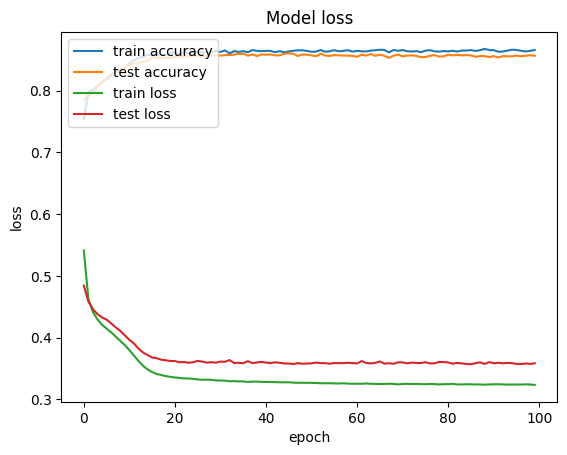

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])

plt.title("Model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train accuracy", "test accuracy" , "train loss", "test loss"], loc='upper left')
plt.show()

# Predicting for test data


In [ ]:
y_pred = classifier.predict(X_test)
y_Pred = (y_pred > 0.5)

63/63 [==============================] - 0s 2ms/step


- Converting it to boolean type


In [ ]:
y_test = y_test.astype(bool)

In [ ]:
y_test

7707    False
3134    False
9902    False
165     False
6531    False
        ...  
7296    False
6021    False
4448    False
8195    False
5461    False
Name: Exited, Length: 2000, dtype: bool

In [ ]:
#Conveting to dataframe¶

y_pred = pd.DataFrame(y_Pred)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1538   57]
 [ 234  171]]


In [ ]:
# Accuracy Score
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

0.8545
